# LKJ Cholesky Covariance Priors for Multivariate Normal Models

> While the inverse-Wishart distribution is the conjugate prior for the covariance matrix of a multivariate normal distribution, it is not very well-suited to modern Bayesian computational methods.
> For this reason, the LKJ prior is recommended when modeling the covariance matrix of a multivariate normal distribution.

We will demonstrate modeling the covariance with the LKJ distribution using mock data.

In [10]:
import warnings

import arviz as az
import numpy as np
import pandas as pd
import plotnine as gg
import pymc3 as pm
import seaborn as sns
from icecream import ic
from matplotlib import pyplot as plt

warnings.simplefilter(action="ignore", category=FutureWarning)
RANDOM_SEED = 8924
np.random.seed(3264602)
gg.theme_set(gg.theme_minimal())

%config InlineBackend.figure_format = "retina"

In [3]:
N = 10000

μ_actual = np.array([1.0, -2.0])
σ_actual = np.array([0.7, 1.5])
Ρ_actual = np.matrix([[1.0, -0.4], [-0.4, 1.0]])

Σ_actual = np.diag(σ_actual) * Ρ_actual * np.diag(σ_actual)

x = np.random.multivariate_normal(μ_actual, Σ_actual, size=N)

ic(Σ_actual);

ic| Σ_actual: matrix([[ 0.49, -0.42],
                      [-0.42,  2.25]])


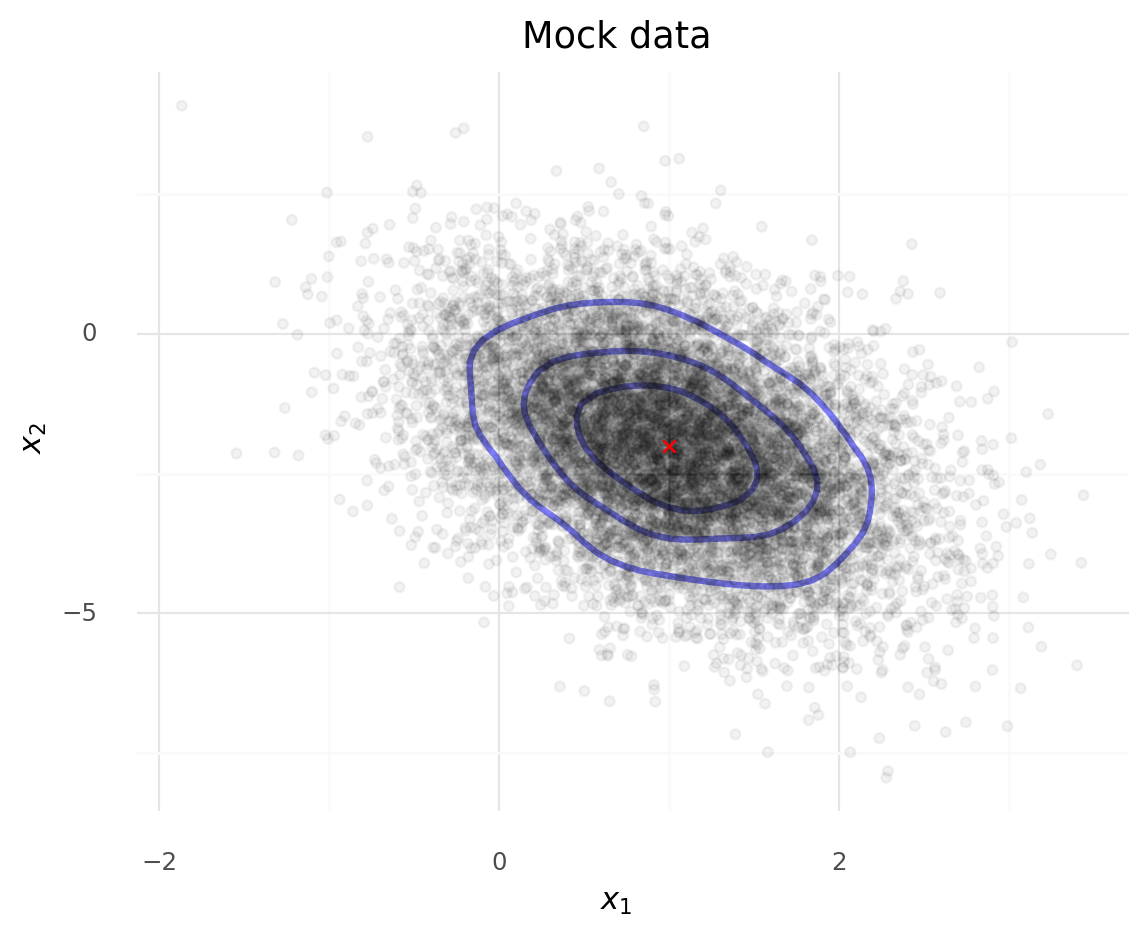

<ggplot: (347255065)>

In [31]:
var, U = np.linalg.eig(Σ_actual)
angle = 180.0 / np.pi * np.arccos(np.abs(U[0, 0]))

plot_data = pd.DataFrame(x, columns=("x1", "x2"))

(
    gg.ggplot(plot_data, gg.aes(x="x1", y="x2"))
    + gg.geom_density_2d(alpha=0.5, size=1.3, color="blue")
    + gg.geom_point(alpha=0.05)
    + gg.geom_point(
        data=pd.DataFrame(μ_actual.reshape((1, 2)), columns=("x1", "x2")),
        color="red",
        shape="x",
        size=2,
    )
    + gg.labs(x="$x_1$", y="$x_2$", title="Mock data")
)

In [16]:
μ_actual

array([ 1., -2.])